### Setup

In [1]:
# bibliotecas
#install.packages("leaps")
#install.packages("ggplot2")
#install.packages("ggpubr")
#install.packages("GGally")

require(leaps)
library(ggplot2)
library(ggpubr)
library(GGally)

Loading required package: leaps
Loading required package: magrittr
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


### Aquisição dos dados

In [2]:
nome_arquivo <- "noshow_4000+_natual"
#nome_arquivo <- "noshow-201808"
noshowDs <- read.csv(paste(nome_arquivo, ".csv", sep = ""), sep = ";", header = TRUE, fileEncoding = "ISO-8859-1")

### Exploração inicial

In [3]:
# dimensões do dataset
dim(noshowDs)

[1] 4581   45

In [4]:
# colunas originais
names(noshowDs)

[1] "IsNoShow"                             
 [2] "DataNascimento"                       
 [3] "Idade"                                
 [4] "GeneroPaciente"                       
 [5] "IsPacienteUnicoAtendimento"           
 [6] "IsNovoPaciente"                       
 [7] "Profissao"                            
 [8] "LeadTime"                             
 [9] "Mes"                                  
[10] "DiaSemana"                            
[11] "Hora"                                 
[12] "EnderecoCidadeUnidade"                
[13] "EnderecoBairroUnidade"                
[14] "EnderecoCepUnidade"                   
[15] "EnderecoCidadePaciente"               
[16] "EnderecoBairroPaciente"               
[17] "EnderecoCepPaciente"                  
[18] "EstacaoAno"                           
[19] "IsPacientePossuiFone"                 
[20] "IsVip"                                
[21] "IsEmancipado"                         
[22] "QtdRedesSociais"                      
[23] "IsEncaixe"                            
[24] "Segmento"                             
[25] "IsPacientePossuiEmail"                
[26] "IsFeriado"                            
[27] "IsParticular"                         
[28] "EspecialidadeSolicitante"             
[29] "IsIndicacaoMedica"                    
[30] "Procedimento"                         
[31] "ProcedimentoMnemonico"                
[32] "ProcedimentoDescricao"                
[33] "Setor"                                
[34] "SetorDescricao"                       
[35] "IsAgendamentoPossuiExecutante"        
[36] "GeneroExecutante"                     
[37] "IsProcedimentoComJejum"               
[38] "IsProcedimentoComPreparacao"          
[39] "IsTodosExamesMesmaUnidade"            
[40] "IsAgendamentoComNecessidadesEspeciais"
[41] "Perguntas"                            
[42] "PerguntasDescricao"                   
[43] "Respostas"                            
[44] "QtdNoShowPaciente"                    
[45] "QtdAgendamentosPaciente"

In [5]:
# inicio e final do dataset para verificação inicial
head(noshowDs)
tail(noshowDs)

IsNoShow,DataNascimento,Idade,GeneroPaciente,IsPacienteUnicoAtendimento,IsNovoPaciente,Profissao,LeadTime,Mes,DiaSemana,⋯,GeneroExecutante,IsProcedimentoComJejum,IsProcedimentoComPreparacao,IsTodosExamesMesmaUnidade,IsAgendamentoComNecessidadesEspeciais,Perguntas,PerguntasDescricao,Respostas,QtdNoShowPaciente,QtdAgendamentosPaciente
<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
0,1974-06-29,46,M,1,1,MEDICO ORTOMOLECULAR,2,6,5,⋯,F,0,1,0,0,null,null,null,0,1
0,1923-12-22,97,F,0,1,MEDICO ORTOMOLECULAR,1,6,5,⋯,M,0,1,0,0,null,null,null,0,2
0,1919-01-24,101,M,0,1,MEDICO ORTOMOLECULAR,0,6,5,⋯,M,0,1,0,0,null,null,null,1,3
0,1936-08-01,84,F,0,1,null,2,6,5,⋯,F,0,1,0,0,null,null,null,0,3
0,1952-06-23,68,F,1,1,null,1,6,5,⋯,M,0,1,0,0,null,null,null,0,1
0,1934-11-02,86,F,0,1,null,0,6,5,⋯,M,0,1,0,0,null,null,null,0,6


,IsNoShow,DataNascimento,Idade,GeneroPaciente,IsPacienteUnicoAtendimento,IsNovoPaciente,Profissao,LeadTime,Mes,DiaSemana,⋯,GeneroExecutante,IsProcedimentoComJejum,IsProcedimentoComPreparacao,IsTodosExamesMesmaUnidade,IsAgendamentoComNecessidadesEspeciais,Perguntas,PerguntasDescricao,Respostas,QtdNoShowPaciente,QtdAgendamentosPaciente
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,⋯,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>
4576,0,1930-09-11,90,F,0,0,MEDICO ORTOMOLECULAR,14,2,5,⋯,M,0,1,0,0,null,null,null,2,17
4577,0,1932-05-22,88,F,0,0,MEDICO ORTOMOLECULAR,8,2,6,⋯,M,0,1,0,0,null,null,null,3,68
4578,1,1930-11-28,90,M,0,0,MEDICO ORTOMOLECULAR,9,2,7,⋯,M,0,1,0,0,null,null,null,2,7
4579,0,1932-05-22,88,F,0,0,MEDICO ORTOMOLECULAR,15,3,6,⋯,M,0,1,0,0,null,null,null,3,68
4580,1,1979-07-27,41,F,0,0,null,30,3,7,⋯,F,0,1,0,0,null,null,null,2,4
4581,1,1978-11-09,42,M,0,0,null,33,3,3,⋯,M,0,1,0,0,null,null,null,1,2


In [6]:
# sumário estatístico do dataset
summary(noshowDs)

    IsNoShow         DataNascimento     Idade        GeneroPaciente
 Min.   :0.0000   1932-05-22:  36   Min.   :  2.00   F:3180        
 1st Qu.:0.0000   1939-01-27:  21   1st Qu.: 66.00   M:1400        
 Median :0.0000   1927-07-07:  14   Median : 81.00   N:   1        
 Mean   :0.2183   1934-03-12:  14   Mean   : 73.27                 
 3rd Qu.:0.0000   1940-08-12:  13   3rd Qu.: 89.00                 
 Max.   :1.0000   1947-10-09:  13   Max.   :120.00                 
                  (Other)   :4470                                  
 IsPacienteUnicoAtendimento IsNovoPaciente                  Profissao   
 Min.   :0.0000             Min.   :0.0000   Médico              :   2  
 1st Qu.:0.0000             1st Qu.:0.0000   MEDICO ORTOMOLECULAR:3177  
 Median :0.0000             Median :1.0000   null                :1402  
 Mean   :0.2471             Mean   :0.5944                              
 3rd Qu.:0.0000             3rd Qu.:1.0000                              
 Max.   :1.0000   

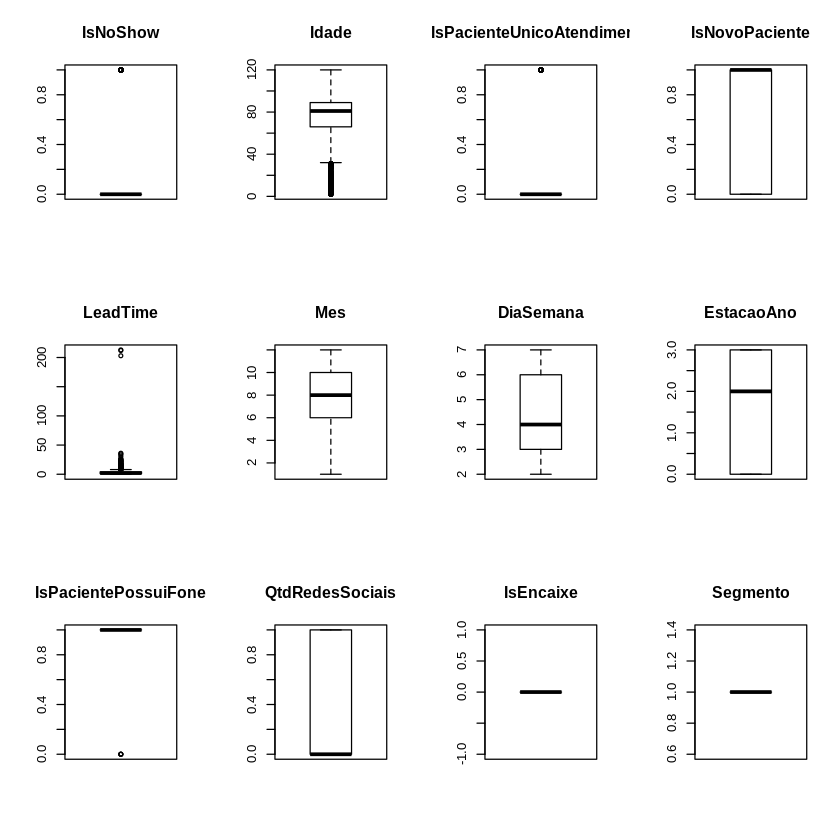

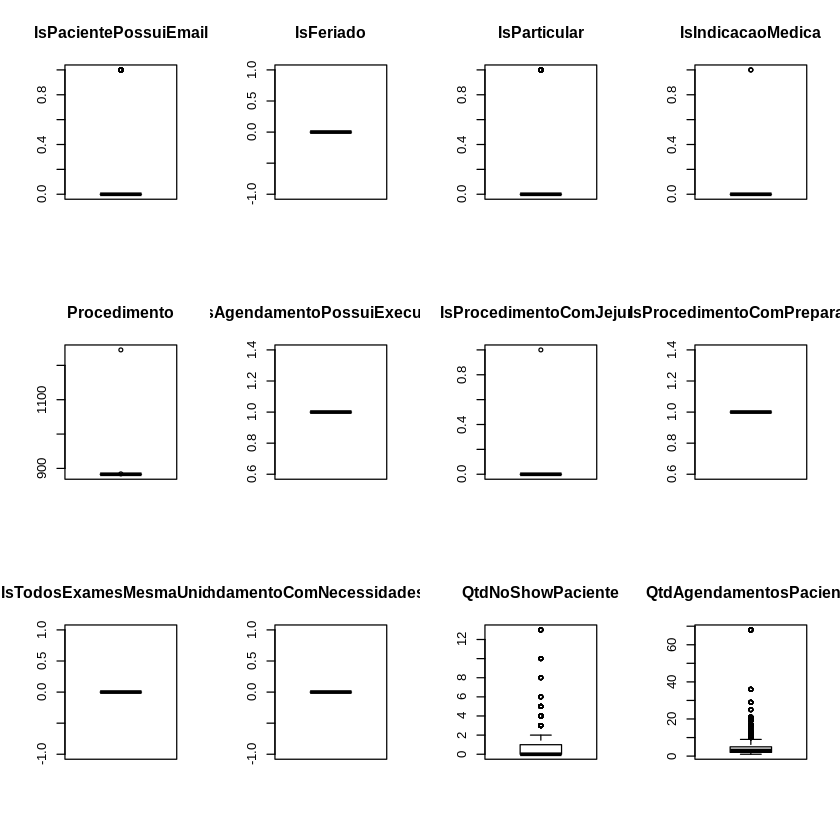

In [7]:
# exibição da distribuição dos atributos numéricos
par(mfrow=c(3, 4))
cols <- names(noshowDs)[!sapply(noshowDs, class) %in% c("factor", "logical")]
for (col in cols) {
    boxplot(noshowDs[,col], main=col, type="l")
}

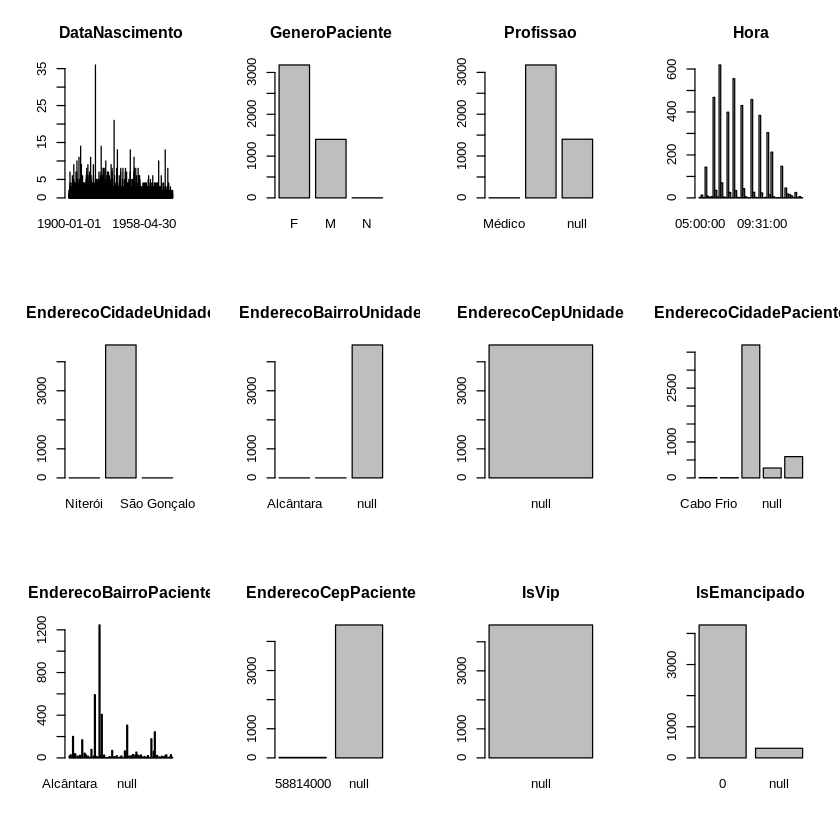

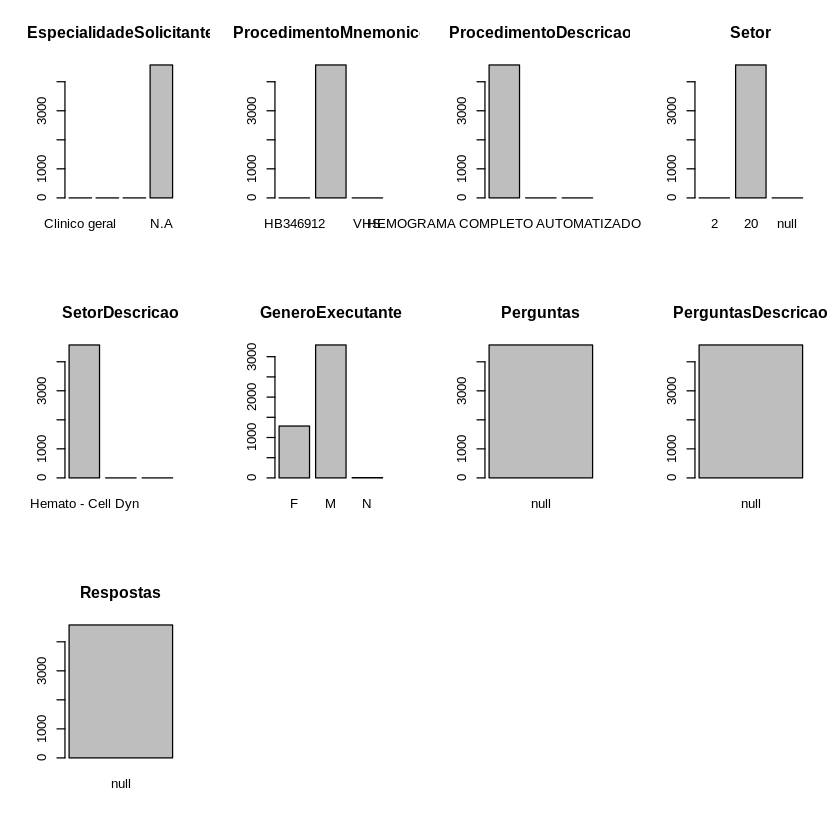

In [8]:
# exibição da distribuição dos dados numéricos
par(mfrow=c(3,4))
cols <- names(noshowDs)[sapply(noshowDs, class) %in% c("factor", "logical")]
for (col in cols) {
    plot(noshowDs[,col], main = col)
}

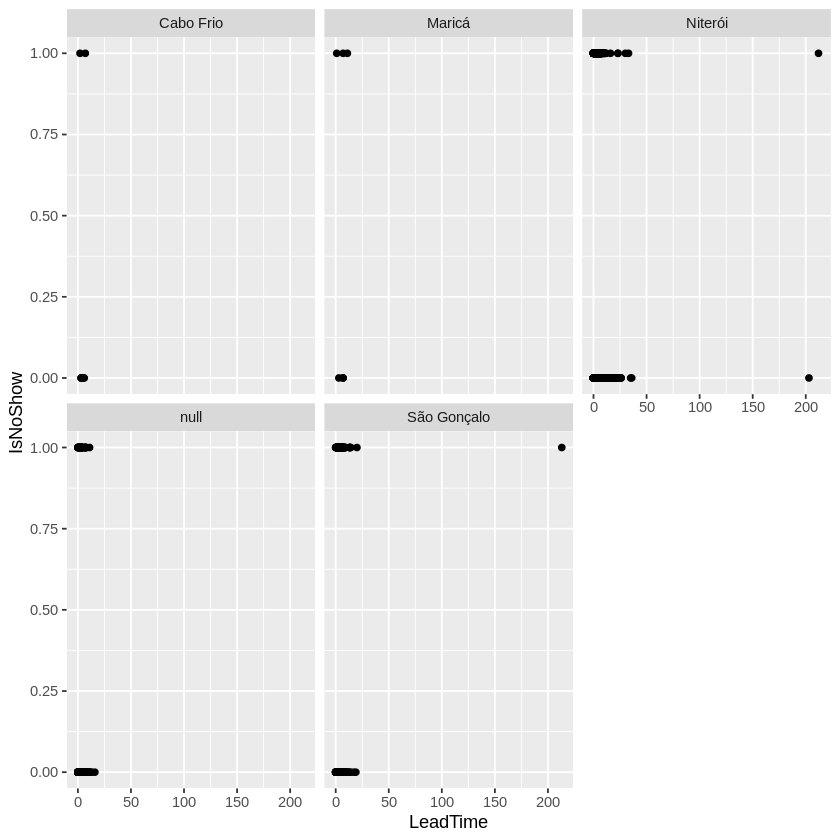

In [9]:
# investigação para ver se localização revela algum padrão
ggplot(noshowDs, aes(x = LeadTime, y = IsNoShow)) + geom_point() + facet_wrap(~ EnderecoCidadePaciente)

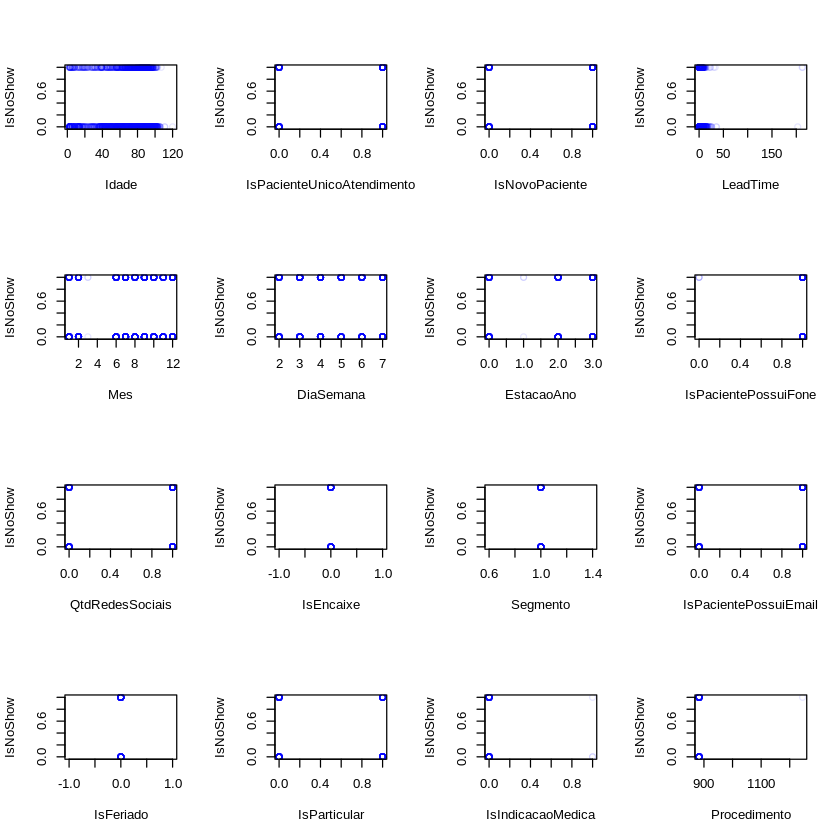

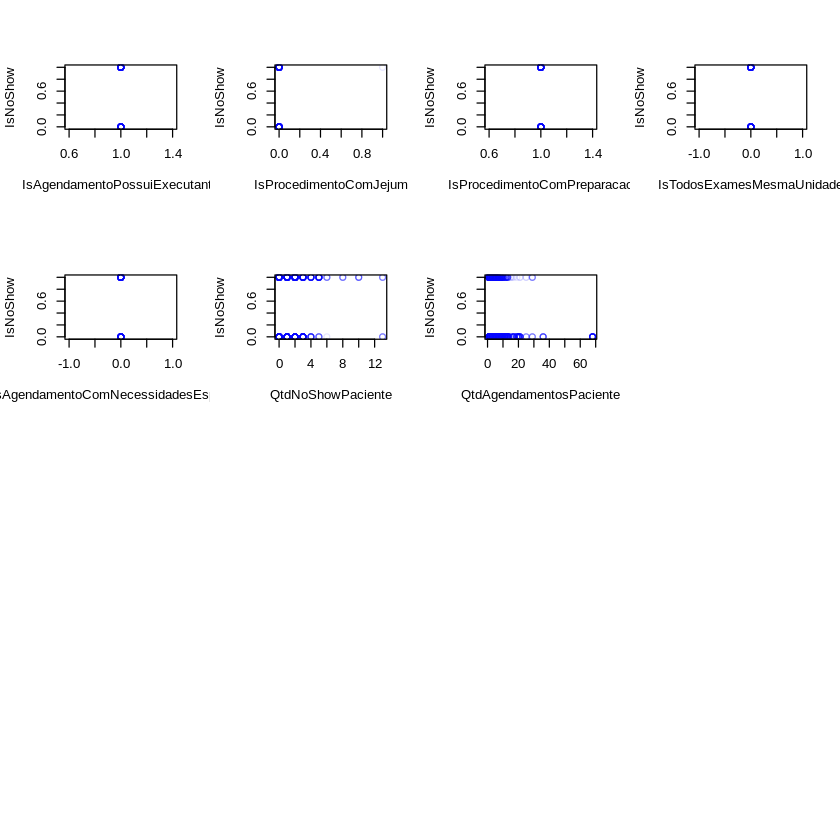

In [10]:
# gráficos de dispersão
par(mfrow=c(4, 4))
cols <- names(noshowDs)[!sapply(noshowDs, class) %in% c("factor")]
cols <- cols[!cols %in% c("IsNoShow")]
for (col in cols) {
    plot(x = noshowDs[,col], y = noshowDs$IsNoShow, xlab = col, ylab = "IsNoShow", col = alpha("blue", 0.1))
}

### Transformações

In [11]:
# transforma todas as string "null" em NA
noshowDs[noshowDs == "null"] <- NA

In [12]:
# remoção de outliers
cols <- c("Idade", "LeadTime")
for (col in cols) {
    out_values <- boxplot.stats(noshowDs[,col])$out
    noshowDs[noshowDs[,col] %in% out_values, col] <- NA
}

In [13]:
# remoção de colunas que não serão utilizadas na modelagem
col_excluir <- c(
    "DataNascimento",
    "EnderecoCidadeUnidade", "EnderecoBairroUnidade", "EnderecoCepUnidade",
    "EnderecoCidadePaciente", "EnderecoBairroPaciente", "EnderecoCepPaciente",
    "Profissao", "IsEmancipado", "EspecialidadeSolicitante", "ProcedimentoMnemonico", 
    "Procedimento", "ProcedimentoDescricao", "Setor", "SetorDescricao",
    "IsVip", "Perguntas", "PerguntasDescricao", "Respostas", "Segmento", "IsFeriado", 
    #"GeneroExecutante", #"IsParticular",
    # não estavam deixando o modelo convergir...
    "EstacaoAno","IsEncaixe","IsIndicacaoMedica","IsProcedimentoComJejum", "IsProcedimentoComPreparacao",
    "IsTodosExamesMesmaUnidade", "IsAgendamentoComNecessidadesEspeciais", "IsAgendamentoPossuiExecutante"
)
noshowDs <- noshowDs[!(names(noshowDs) %in% col_excluir)]

In [14]:
summary(noshowDs)

    IsNoShow          Idade        GeneroPaciente IsPacienteUnicoAtendimento
 Min.   :0.0000   Min.   : 32.00   F:3180         Min.   :0.0000            
 1st Qu.:0.0000   1st Qu.: 70.00   M:1400         1st Qu.:0.0000            
 Median :0.0000   Median : 83.00   N:   1         Median :0.0000            
 Mean   :0.2183   Mean   : 78.68                  Mean   :0.2471            
 3rd Qu.:0.0000   3rd Qu.: 90.00                  3rd Qu.:0.0000            
 Max.   :1.0000   Max.   :120.00                  Max.   :1.0000            
                  NA's   :376                                               
 IsNovoPaciente      LeadTime          Mes           DiaSemana    
 Min.   :0.0000   Min.   :0.000   Min.   : 1.000   Min.   :2.000  
 1st Qu.:0.0000   1st Qu.:1.000   1st Qu.: 6.000   1st Qu.:3.000  
 Median :1.0000   Median :2.000   Median : 8.000   Median :4.000  
 Mean   :0.5944   Mean   :2.597   Mean   : 7.487   Mean   :4.411  
 3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:10.000 

In [15]:
# remove linhas com NA
noshowDs <- na.omit(noshowDs)
nrow(noshowDs)

[1] 4086

In [16]:
# transformação da coluna de horário em numérico
# calcula a quantidade de segundos a partir de 00:00:00
tmp1 <- paste(Sys.Date(), " ", noshowDs$Hora)
tmp2 <- as.POSIXct(tmp1)
tmp3 <- as.POSIXct(paste(Sys.Date(), " 00:00:00"))
noshowDs$Hora <- as.numeric(tmp2) - as.numeric(tmp3)

In [17]:
# transforma todas as colunas 0/1 em FALSE/TRUE
bool_columns <- c(
    "IsNoShow", "IsNovoPaciente", "IsPacientePossuiFone", "IsPacientePossuiEmail", "IsParticular"
)
noshowDs[bool_columns] <- noshowDs[bool_columns] == 1

In [18]:
# cria uma coluna com a razão de no-show do paciente
noshowDs["RazaoNoShowPaciente"] <- noshowDs["QtdNoShowPaciente"] / noshowDs["QtdAgendamentosPaciente"]

In [19]:
# colunas selecionadas para modelagem
names(noshowDs)
length(names(noshowDs))

[1] "IsNoShow"                   "Idade"                     
 [3] "GeneroPaciente"             "IsPacienteUnicoAtendimento"
 [5] "IsNovoPaciente"             "LeadTime"                  
 [7] "Mes"                        "DiaSemana"                 
 [9] "Hora"                       "IsPacientePossuiFone"      
[11] "QtdRedesSociais"            "IsPacientePossuiEmail"     
[13] "IsParticular"               "GeneroExecutante"          
[15] "QtdNoShowPaciente"          "QtdAgendamentosPaciente"   
[17] "RazaoNoShowPaciente"

[1] 17

### Armazenamento das transformações

In [20]:
write.table(noshowDs, file = paste(nome_arquivo, "_trans.csv", sep = ""), sep = ";", fileEncoding = "ISO-8859-1", row.names=FALSE)

### Análise exploratória

In [21]:
# sumário estatístico do dataset depois das transformações
summary(noshowDs)

  IsNoShow           Idade        GeneroPaciente IsPacienteUnicoAtendimento
 Mode :logical   Min.   : 32.00   F:2919         Min.   :0.0000            
 FALSE:3216      1st Qu.: 70.00   M:1166         1st Qu.:0.0000            
 TRUE :870       Median : 83.00   N:   1         Median :0.0000            
                 Mean   : 78.74                  Mean   :0.2222            
                 3rd Qu.: 90.00                  3rd Qu.:0.0000            
                 Max.   :120.00                  Max.   :1.0000            
 IsNovoPaciente     LeadTime          Mes           DiaSemana    
 Mode :logical   Min.   :0.000   Min.   : 1.000   Min.   :2.000  
 FALSE:1715      1st Qu.:1.000   1st Qu.: 6.000   1st Qu.:3.000  
 TRUE :2371      Median :2.000   Median : 8.000   Median :4.000  
                 Mean   :2.588   Mean   : 7.528   Mean   :4.407  
                 3rd Qu.:4.000   3rd Qu.:10.000   3rd Qu.:6.000  
                 Max.   :8.000   Max.   :12.000   Max.   :7.000  
      

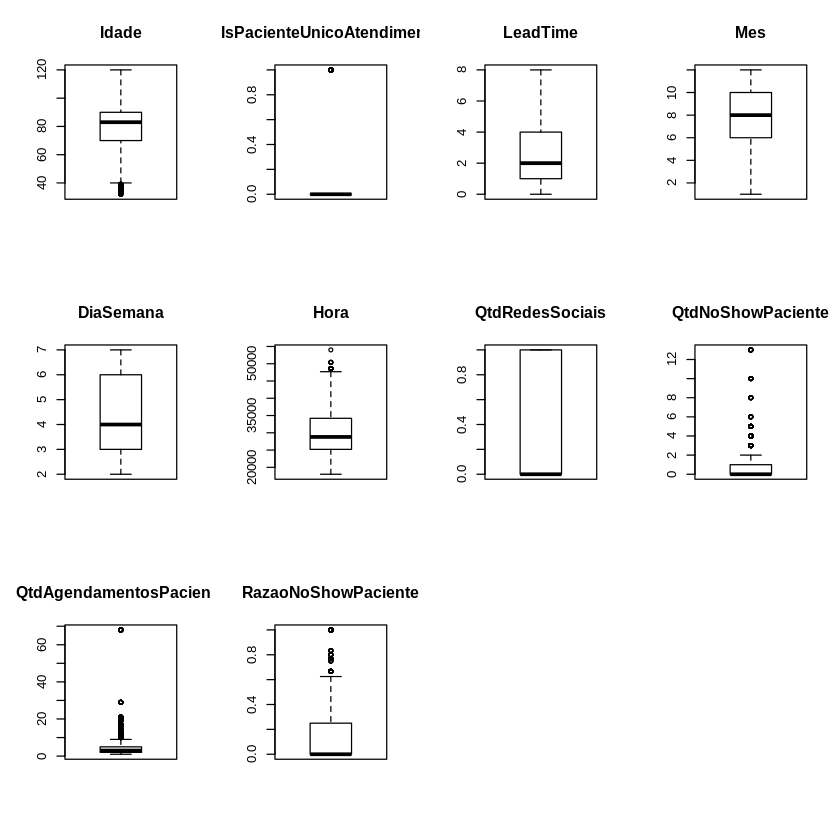

In [22]:
# exibição da distribuição dos atributos numéricos
par(mfrow=c(3, 4))
cols <- names(noshowDs)[!sapply(noshowDs, class) %in% c("factor", "logical")]
for (col in cols) {
    boxplot(noshowDs[,col], main=col, type="l")
}

Warning message in ggcorr(noshowDs, label = TRUE):
“data in column(s) 'IsNoShow', 'GeneroPaciente', 'IsNovoPaciente', 'IsPacientePossuiFone', 'IsPacientePossuiEmail', 'IsParticular', 'GeneroExecutante' are not numeric and were ignored”

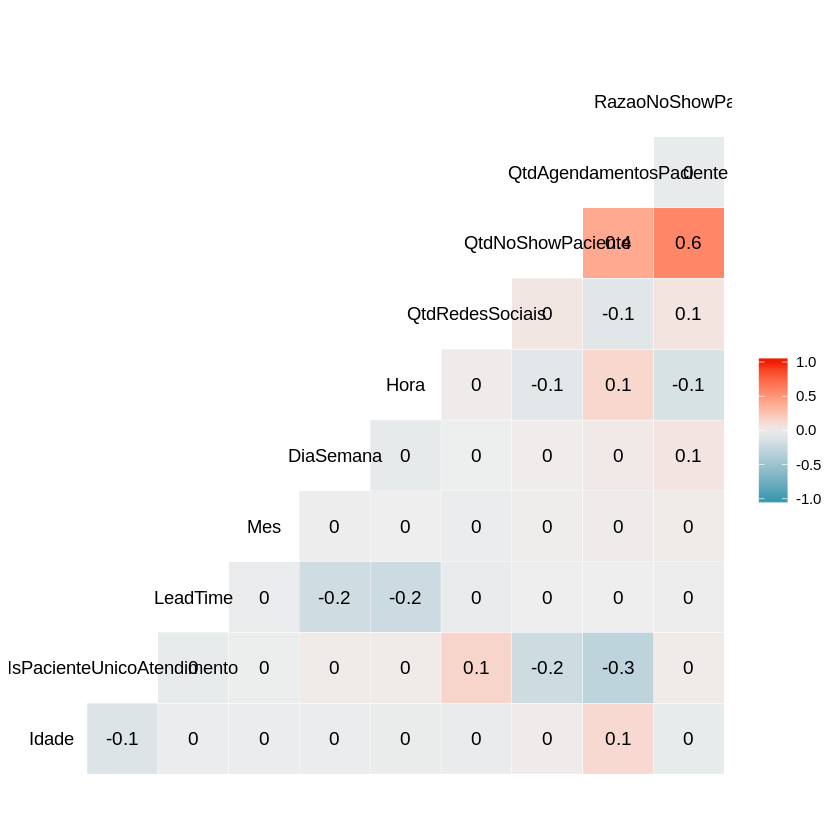

In [23]:
# monta um gráfico mostrando a correlação entre as variáveis numéricas
ggcorr(noshowDs, label = TRUE)

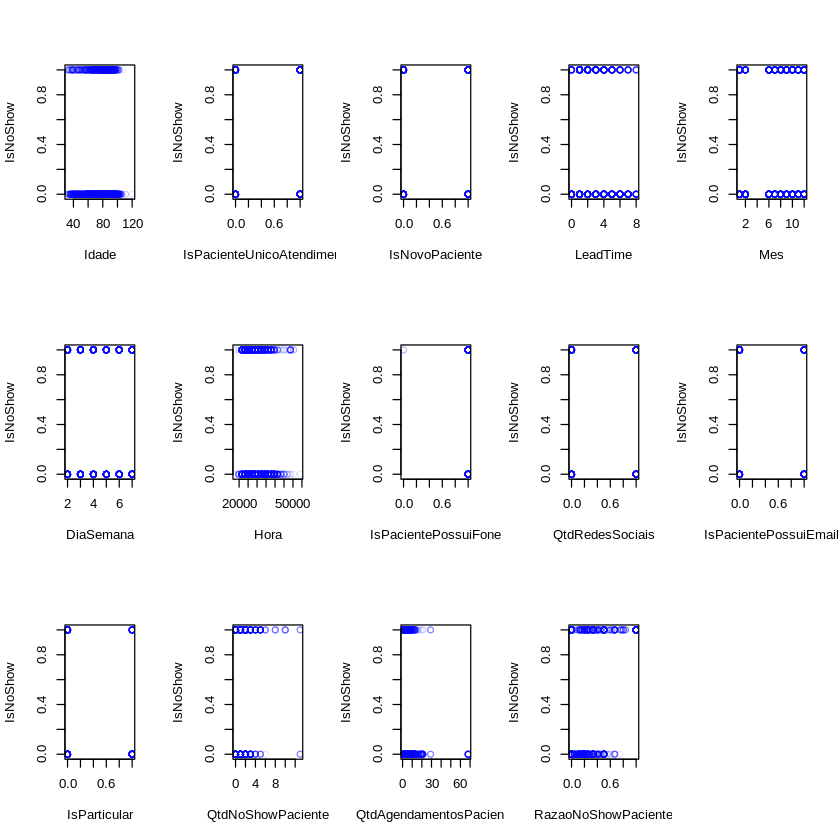

In [24]:
# gráficos de dispersão
par(mfrow=c(3, 5))
cols <- names(noshowDs)[!sapply(noshowDs, class) %in% c("factor")]
cols <- cols[!cols %in% c("IsNoShow")]
for (col in cols) {
    plot(x = noshowDs[,col], y = noshowDs$IsNoShow, xlab = col, ylab = "IsNoShow", col = alpha("blue", 0.1))
}

### Conclusões da exploração:

* Algumas colunas foram exlcuídas da modelagem. A tabela abaixo resumo os motivos.

| Coluna                   | Motivo                                          |
|--------------------------|-------------------------------------------------|
| DataNascimento           | Irrelevante para a modelagem; foi usada a idade |
| EnderecoCidadeUnidade    | Gera factors com muitos levels                  |
| EnderecoBairroUnidade    | Gera factors com muitos levels                  |
| EnderecoCepUnidade       | Gera factors com muitos levels                  |
| EnderecoCidadePaciente   | Gera factors com muitos levels                  |
| EnderecoBairroPaciente   | Gera factors com muitos levels                  |
| EnderecoCepPaciente      | Gera factors com muitos levels                  |
| IsVip                    | Todos os valores nulos                          |
| Perguntas                | Todos os valores nulos                          |
| PerguntasDescricao       | Todos os valores nulos                          |
| Respostas                | Todos os valores nulos                          |
| Profissao                | Atributo com um único valor                     |
| IsEmancipado             | Atributo com um único valor                     |
| EspecialidadeSolicitante | Atributo com um único valor                     |
| Procedimento             | Atributo ID                                     |
| ProcedimentoMnemonico    | Atributo com um único valor                     |
| ProcedimentoDescricao    | Atributo com um único valor                     |
| Setor                    | Atributo com um único valor                     |
| SetorDescricao           | Atributo com um único valor                     |
| Semgmento                | Atributo com um único valor                     |

* As variáveis numéricas selecionadas para a modelagem não possuem correlação significativa, com exceção das variáveis .